## MODELOS SEÇÃO 6
Determinância e Política Monetária no Brasil: Uma Avaliação Empírica do Princípio de Taylor (1999–2024)

### PARTE 1: PREPARAÇÃO

#### [0. SETUP]

#### 0.1 Importar bibliotecas ####

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### 0.2 Importar dfs ####

##### ecobr #####

In [4]:
## df economia br 1999-2024
ecobr = pd.read_csv('../dados/fernando/economia_br9924.csv')
ecobr = ecobr.rename(columns={'Unnamed: 0': 'data'})
ecobr['data'] = pd.to_datetime(ecobr['data'], format='%Y-%m-%d')

In [5]:
ecobr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   data                          9437 non-null   datetime64[ns]
 1   IPCA_Mensal                   9437 non-null   float64       
 2   IPCA_12m                      9437 non-null   float64       
 3   Selic_Meta                    9434 non-null   float64       
 4   Expectativa_IPCA_AnoCorrente  9132 non-null   float64       
 5   PIB_Indice                    9437 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 442.5 KB


In [6]:
## Renomear colunas (padrão: i_, pi_)
ecobr = ecobr.rename(columns={
    'data': 'ano_mes_dia',
    'IPCA_Mensal': 'pi_ipca_mensal',
    'IPCA_12m': 'pi_ipca12',
    'Selic_Meta': 'i_selic',
    'Expectativa_IPCA_AnoCorrente': 'pi_ipca_expectativa',
    'PIB_Indice': 'pib_indice'
})

In [7]:
ecobr

,ano_mes_dia,pi_ipca_mensal,pi_ipca12,i_selic,pi_ipca_expectativa,pib_indice
0,1999-01-01,0.70,1.65,NaN,NaN,99.26343
1,1999-02-01,1.05,2.24,NaN,NaN,99.26343
2,1999-03-01,1.10,3.02,NaN,NaN,99.26343
3,1999-03-05,1.10,3.02,45.00,NaN,99.26343
4,1999-03-06,1.10,3.02,45.00,NaN,99.26343
...,...,...,...,...,...,...
9432,2024-12-27,0.52,4.83,12.25,4.867495,179.26343
9433,2024-12-28,0.52,4.83,12.25,4.867495,179.26343
9434,2024-12-29,0.52,4.83,12.25,4.867495,179.26343
9435,2024-12-30,0.52,4.83,12.25,4.867495,179.26343


<Axes: >

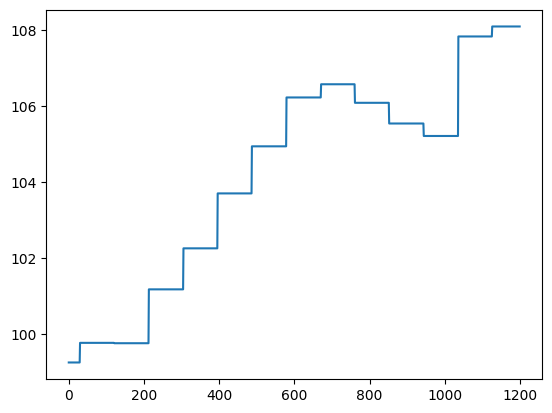

In [8]:
ecobr['pib_indice'][0:1200].plot()

In [9]:
ecobr.describe()

,ano_mes_dia,pi_ipca_mensal,pi_ipca12,i_selic,pi_ipca_expectativa,pib_indice
count,9437,9437.000000,9437.000000,9434.000000,9132.000000,9437.000000
mean,2012-01-30 23:45:48.542969088,0.506562,6.254480,12.687063,5.625636,143.189876
min,1999-01-01 00:00:00,-0.680000,1.650000,2.000000,1.610952,99.263430
25%,2005-08-16 00:00:00,0.260000,4.480000,9.000000,4.242536,120.844476
50%,2012-01-31 00:00:00,0.460000,5.910000,12.250000,5.501495,153.657049
75%,2018-07-17 00:00:00,0.690000,7.350000,16.000000,6.424783,161.341778
max,2024-12-31 00:00:00,3.020000,17.240000,45.000000,12.406316,179.526155
std,NaN,0.394423,2.721792,5.548323,1.925875,23.252670


##### hiato #####

In [10]:
## df economia br 1999-2024
hiato = pd.read_csv('../dados/fernando/hiato_br9924.csv')
hiato = hiato.drop(columns=['Unnamed: 0'])
hiato = hiato.rename(columns={'data': 'ano_trim'})

# Função para converter ano_trim para data no formato desejado
def ano_trim_to_date(ano_trim):
    ano = int(ano_trim[:4])
    trimestre = int(ano_trim[-1])
    if trimestre == 1:
        return f"{ano}-03-31"
    elif trimestre == 2:
        return f"{ano}-06-30"
    elif trimestre == 3:
        return f"{ano}-09-30"
    elif trimestre == 4:
        return f"{ano}-12-31"

hiato['data'] = hiato['ano_trim'].apply(ano_trim_to_date)
hiato['data'] = pd.to_datetime(hiato['data'], format='%Y-%m-%d')

# Rearranje a coluna 'data' para ficar ao lado direito da coluna 'ano_trim'
cols = hiato.columns.tolist()
cols.insert(1, cols.pop(cols.index('data')))
hiato = hiato[cols]


In [11]:
hiato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ano_trim              104 non-null    object        
 1   data                  104 non-null    datetime64[ns]
 2   Tendência Linear      104 non-null    float64       
 3   Tendência Quadrática  104 non-null    float64       
 4   Filtro HP             104 non-null    float64       
 5   Filtro de Hamilton    93 non-null     float64       
 6   IFI                   104 non-null    float64       
 7   BCB                   85 non-null     float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.6+ KB


In [12]:
## Renomear colunas (padrão: tilde_y_ para hiato do produto)
hiato = hiato.rename(columns={
    'data': 'ano_mes_dia',
    'Tendência Linear': 'tilde_y_tend_linear',
    'Tendência Quadrática': 'tilde_y_tend_quadr',
    'Filtro HP': 'tilde_y_filtro_hp',
    'Filtro de Hamilton': 'tilde_y_filtro_hamilton',
    'IFI': 'tilde_y_ifi',
    'BCB': 'tilde_y_bcb'
})

In [13]:
hiato

,ano_trim,ano_mes_dia,tilde_y_tend_linear,tilde_y_tend_quadr,tilde_y_filtro_hp,tilde_y_filtro_hamilton,tilde_y_ifi,tilde_y_bcb
0,1999Q1,1999-03-31,-7.033520,3.771221,0.003118,NaN,-1.51,NaN
1,1999Q2,1999-06-30,-7.051331,3.088954,-0.154229,NaN,-1.81,NaN
2,1999Q3,1999-09-30,-7.558478,1.884706,-0.836256,NaN,-1.95,NaN
3,1999Q4,1999-12-31,-6.748484,2.146928,-0.105525,NaN,-1.80,NaN
4,2000Q1,2000-03-31,-6.259466,2.065477,0.280346,NaN,-1.29,NaN
...,...,...,...,...,...,...,...,...
99,2023Q4,2023-12-31,-4.551327,3.925313,0.069892,3.798547,-0.13,0.47
100,2024Q1,2024-03-31,-4.298396,4.830733,0.132524,3.952841,0.10,0.71
101,2024Q2,2024-06-30,-3.188127,6.701502,1.086839,4.496560,0.47,0.95
102,2024Q3,2024-09-30,-2.844051,7.755229,1.237231,4.589841,0.91,1.14


In [14]:
hiato.describe()

,ano_mes_dia,tilde_y_tend_linear,tilde_y_tend_quadr,tilde_y_filtro_hp,tilde_y_filtro_hamilton,tilde_y_ifi,tilde_y_bcb
count,104,104.000000,104.000000,104.000000,93.000000,104.000000,85.000000
mean,2012-02-14 06:00:00,0.214262,0.083480,0.016705,0.090397,-0.819423,-0.264706
min,1999-03-31 00:00:00,-14.782081,-13.591256,-9.789709,-11.282942,-9.570000,-6.740000
25%,2005-09-07 00:00:00,-4.953473,-3.266832,-0.738433,-1.967810,-1.700000,-1.520000
50%,2012-02-14 12:00:00,-2.016555,-0.827425,0.339929,0.290108,-0.700000,0.160000
75%,2018-07-23 00:00:00,5.143897,3.660817,1.077431,2.432698,0.460000,0.960000
max,2024-12-31 00:00:00,12.841388,7.755229,3.548670,10.856603,2.150000,2.400000
std,NaN,6.663592,4.102126,1.816306,4.252716,1.728831,1.697518


#### 0.3 Construir df base dos modelos ####

##### Equalização períodos (tudo trimestral) #####

In [15]:
## 0) Garantir datetime na coluna de data (sem mexer no índice)
ecobr['ano_mes_dia'] = pd.to_datetime(ecobr['ano_mes_dia'], errors='coerce')

# SETUP: ecobr (diário/mensal "inflado") -> trimestral
# (PIB é trimestral na origem, mas está replicado ao longo do ecobr)

In [16]:
## 1) Agregação trimestral da inflação mensal (pi_ipca_mensal)

def ipca_q_composto(x):
    """
    pi_ipca_mensal é % m/m.
    Constrói inflação acumulada no trimestre (% no trimestre) via composição:
        Π(1 + π_m/100) - 1

    Interpretação:
    - aproxima a inflação "do trimestre" (q/q) do NK canônico (a partir de preços).
    """
    x = x.dropna()
    if len(x) == 0:
        return np.nan
    return (np.prod(1 + x/100.0) - 1) * 100.0

def ipca_q_media_mensal(x):
    """
    Média simples das taxas mensais dentro do trimestre.
    NÃO é a definição NK canônica de inflação trimestral, mas pode ser usada como robustez.
    """
    return x.mean()


In [17]:
## 2) Agregação trimestral de TODAS as variáveis do ecobr

# (i) i_selic: média no trimestre
#     - Interpretação: i_t (instrumento de política) vigente ao longo do trimestre.
#     - Entra como i_t em todas as regras (backward MQO, forward GMM, híbrida GMM).

# (ii) pi_ipca12: último valor do trimestre (end-of-quarter)
#     - Interpretação: π_t como inflação 12m consolidada no fim do trimestre.
#     - Entra como π_t nas regras backward e híbrida (baseline aplicado).

# (iii) pi_ipca_expectativa: média no trimestre
#     - Interpretação: proxy para E_t[π] nas regras forward/híbrida (GMM).
#     - Nota: "ano corrente" tem horizonte variável no ano (proxy imperfeita).

# (iv) pib_indice: último valor do trimestre
#     - Interpretação: série trimestral na origem; 'last' evita problemas por replicação.
#     - Uso: base para hiato (se for reconstruir) / auditoria (hiato entra via df hiato).

# (v) pi_ipca_mensal: cria duas versões trimestrais
#     - pi_ipca_mensal_q_mean: média das taxas mensais no trimestre (proxy/robustez)
#     - pi_ipca_q_comp: inflação acumulada no trimestre (q/q em %)

ecobrq = (
    ecobr
    .resample('QE-DEC', on='ano_mes_dia')
    .agg({
        'i_selic': 'mean',
        'pi_ipca12': 'last',
        'pi_ipca_expectativa': 'mean',
        'pib_indice': 'last',
        'pi_ipca_mensal': [ipca_q_media_mensal, ipca_q_composto],
    })
    .dropna(how='all')
)

ecobrq.columns = [
    'i_selic_q_mean',           # i_t
    'pi_ipca12_q_last',          # π_t (12m, fim do trimestre)
    'pi_ipca_expect_q_mean',     # E_t[π] proxy (média no trimestre)
    'pib_indice_q_last',         # PIB (fim do trimestre)
    'pi_ipca_mensal_q_mean',     # proxy/robustez (média das taxas mensais)
    'pi_ipca_q_comp',            # π_t q/q (inflação do trimestre, acumulada)
]

In [18]:
## 2.1) Transformar em "padrão trimestral" mas com ano_mes_dia como COLUNA

ecobrq.index = ecobrq.index.to_period('Q')
ecobrq.index.name = 'ano_trim'          # garante que reset_index cria a coluna 'ano_trim'

ecobrq = ecobrq.reset_index()          # agora existe ecobrq['ano_trim'] com dtype Period[Q]

# cria data calendário do fim do trimestre como coluna explícita (datetime)
ecobrq['ano_mes_dia'] = ecobrq['ano_trim'].dt.to_timestamp(how='end').dt.normalize()

# reorganiza colunas para data primeiro (opcional, mas ajuda em merges/plots)
cols = ['ano_mes_dia', 'ano_trim'] + [c for c in ecobrq.columns if c not in ['ano_mes_dia', 'ano_trim']]
ecobrq = ecobrq[cols]

In [19]:
## 3) Como essas variáveis entram nas equações do paper

# (A) Regra backward-looking (MQO), forma típica:
#     i_t = c + ρ i_{t-1} + (1-ρ)[ φ_π π_t + φ_y ygap_t ] + u_t
#     - i_t      : i_selic_q_mean
#     - i_{t-1}  : lag(i_selic_q_mean)
#     - π_t      : baseline -> pi_ipca12_q_last
#                 robustez -> pi_ipca_q_comp (se anualizar/compatibilizar unidades)
#     - ygap_t   : vem do df hiato (HP/Hamilton/BK/IFI etc.), já trimestral

# (B) Regra forward-looking (GMM), forma típica:
#     i_t = c + ρ i_{t-1} + (1-ρ)[ φ_π E_t(π_{t+1}) + φ_y E_t(ygap_{t+1}) ] + u_t
#     - i_t          : i_selic_q_mean
#     - E_t(π_{t+1}) : proxy -> pi_ipca_expect_q_mean
#     - instrumentos : defasagens de inflação/juros/hiato (definidos por você no GMM)

# (C) Regra híbrida com suavização (GMM), forma típica:
#     i_t = c + ρ i_{t-1} + (1-ρ)[ φ_π (α π_t + (1-α)E_tπ_{t+1}) + φ_y ygap_t ] + u_t
#     - i_t          : i_selic_q_mean
#     - π_t          : pi_ipca12_q_last (baseline) ou pi_ipca_q_comp (robustez)
#     - E_tπ_{t+1}   : pi_ipca_expect_q_mean (proxy)
#     - ygap_t       : df hiato

# Nota de unidades:
# - i_selic_q_mean, pi_ipca12_q_last, pi_ipca_expect_q_mean estão em % a.a.
# - pi_ipca_q_comp está em % no trimestre (q/q). Se entrar na regressão com i_selic a.a.,
#   recomendo criar uma versão anualizada: ((1+pi_ipca_q_comp/100)**4 - 1)*100

In [20]:
## 4) df ecobrq
ecobrq

,ano_mes_dia,ano_trim,i_selic_q_mean,pi_ipca12_q_last,pi_ipca_expect_q_mean,pib_indice_q_last,pi_ipca_mensal_q_mean,pi_ipca_q_comp
0,1999-03-31,1999Q1,44.222222,3.02,NaN,99.263430,1.085000,38.228675
1,1999-06-30,1999Q2,28.769231,3.32,NaN,99.779498,0.349451,37.346679
2,1999-09-30,1999Q3,19.913043,6.25,NaN,99.770115,0.657065,82.584628
3,1999-12-31,1999Q4,19.000000,8.94,NaN,101.186958,0.912935,130.670775
4,2000-03-31,2000Q1,18.983516,6.92,6.788844,102.266010,0.327582,34.636348
...,...,...,...,...,...,...,...,...
99,2023-12-31,2023Q4,12.326087,4.62,4.597467,173.549144,0.360870,39.279039
100,2024-03-31,2024Q1,11.359890,3.93,3.792305,174.947220,0.462088,52.073580
101,2024-06-30,2024Q2,10.604396,4.23,3.845181,177.931034,0.351209,37.573882
102,2024-09-30,2024Q3,10.532609,4.42,4.226783,179.526155,0.264783,27.517902


 ##### Juntar dfs (df_modelo = ecobr + hiato) #####

In [21]:
df_modelo = (
    ecobrq
    .merge(
        hiato,
        on='ano_mes_dia',
        how='inner',
        validate='one_to_one'
    )
)

In [22]:
df_modelo = (
    df_modelo
    .drop(columns=['ano_trim_y'])
    .rename(columns={'ano_trim_x': 'ano_trim'})
)


In [23]:
df_modelo = df_modelo.rename(columns={'pib_indice_q_last': 'y_pib_indice_q_last'})

In [24]:
df_modelo

,ano_mes_dia,ano_trim,i_selic_q_mean,pi_ipca12_q_last,pi_ipca_expect_q_mean,y_pib_indice_q_last,pi_ipca_mensal_q_mean,pi_ipca_q_comp,tilde_y_tend_linear,tilde_y_tend_quadr,tilde_y_filtro_hp,tilde_y_filtro_hamilton,tilde_y_ifi,tilde_y_bcb
0,1999-03-31,1999Q1,44.222222,3.02,NaN,99.263430,1.085000,38.228675,-7.033520,3.771221,0.003118,NaN,-1.51,NaN
1,1999-06-30,1999Q2,28.769231,3.32,NaN,99.779498,0.349451,37.346679,-7.051331,3.088954,-0.154229,NaN,-1.81,NaN
2,1999-09-30,1999Q3,19.913043,6.25,NaN,99.770115,0.657065,82.584628,-7.558478,1.884706,-0.836256,NaN,-1.95,NaN
3,1999-12-31,1999Q4,19.000000,8.94,NaN,101.186958,0.912935,130.670775,-6.748484,2.146928,-0.105525,NaN,-1.80,NaN
4,2000-03-31,2000Q1,18.983516,6.92,6.788844,102.266010,0.327582,34.636348,-6.259466,2.065477,0.280346,NaN,-1.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-12-31,2023Q4,12.326087,4.62,4.597467,173.549144,0.360870,39.279039,-4.551327,3.925313,0.069892,3.798547,-0.13,0.47
100,2024-03-31,2024Q1,11.359890,3.93,3.792305,174.947220,0.462088,52.073580,-4.298396,4.830733,0.132524,3.952841,0.10,0.71
101,2024-06-30,2024Q2,10.604396,4.23,3.845181,177.931034,0.351209,37.573882,-3.188127,6.701502,1.086839,4.496560,0.47,0.95
102,2024-09-30,2024Q3,10.532609,4.42,4.226783,179.526155,0.264783,27.517902,-2.844051,7.755229,1.237231,4.589841,0.91,1.14


 ##### Criar lags #####

In [25]:
# ============================================================
# CRIAÇÃO DE VARIÁVEIS PARA MODELOS DE REGRA DE TAYLOR
# Dataframe: df_modelo
# Padrão de nomes: i_* (selic), pi_* (ipca), tilde_y_* (hiato)
# ============================================================

df_modelo = df_modelo.sort_values('ano_mes_dia').reset_index(drop=True)

def pick_col(df: pd.DataFrame, *candidates: str) -> str | None:
    """Retorna o primeiro nome de coluna existente em df dentre os candidatos."""
    for name in candidates:
        if name in df.columns:
            return name
    return None

def drop_if_exists(df: pd.DataFrame, cols: list[str]) -> None:
    """Remove colunas se existirem (limpa nomes legados para manter apenas o padrão novo)."""
    existing = [c for c in cols if c in df.columns]
    if existing:
        df.drop(columns=existing, inplace=True)

def rename_cols_padrao(df: pd.DataFrame) -> None:
    """Aplica o padrão de nomes às colunas do df_modelo, se ainda houver nomes antigos."""
    rename_map: dict[str, str] = {}
    for c in df.columns:
        if c.startswith('selic'):
            rename_map[c] = f'i_{c}'
        elif c.startswith('ipca'):
            rename_map[c] = f'pi_{c}'
        elif c.startswith('hiato_'):
            rename_map[c] = f"tilde_y_{c[len('hiato_'):] }"
    if rename_map:
        df.rename(columns=rename_map, inplace=True)

# ------------------------------------------------------------
# 0) NORMALIZAÇÃO + LIMPEZA (garante padrão novo nas colunas)
# ------------------------------------------------------------
rename_cols_padrao(df_modelo)

drop_if_exists(
    df_modelo,
    [
        # legados sem prefixo hiato_
        'hp_lag1', 'hp_lag2', 'hp_lead1',
        'tendencia_linear_lag1', 'tendencia_linear_lag2',
        'tendencia_quadratica_lag1', 'tendencia_quadratica_lag2',
        'filtro_hamilton_lag1', 'filtro_hamilton_lag2',
        'ifi_lag1', 'ifi_lag2',
        'bcb_lag1', 'bcb_lag2',
        # legados com hiato_
        'hiato_filtro_hp_lag1', 'hiato_filtro_hp_lag2', 'hiato_filtro_hp_lead1',
        'hiato_tend_linear_lag1', 'hiato_tend_linear_lag2',
        'hiato_tend_quadr_lag1', 'hiato_tend_quadr_lag2',
        'hiato_filtro_hamilton_lag1', 'hiato_filtro_hamilton_lag2',
        'hiato_ifi_lag1', 'hiato_ifi_lag2',
        'hiato_bcb_lag1', 'hiato_bcb_lag2',
        # legados selic/ipca
        'selic_lag1', 'selic_lag2',
        'ipca12_lag1', 'ipca12_lag2',
        'ipca_q_comp_lag1', 'ipca_q_comp_lag2',
        'ipca_q_comp_ann', 'ipca_q_comp_ann_lag1', 'ipca_q_comp_ann_lag2',
        'ipca_expect_lag1', 'ipca_expect_lag2', 'ipca_expect_lead1',
    ],
)

# ------------------------------------------------------------
# 1) DEFASAGENS DA TAXA DE JUROS (instrumento central)
# ------------------------------------------------------------
df_modelo['i_selic_lag1'] = df_modelo['i_selic_q_mean'].shift(1)
df_modelo['i_selic_lag2'] = df_modelo['i_selic_q_mean'].shift(2)

# ------------------------------------------------------------
# 2) INFLAÇÃO – corrente (baseline e robustez)
# ------------------------------------------------------------
# Baseline (12 meses)
df_modelo['pi_ipca12_lag1'] = df_modelo['pi_ipca12_q_last'].shift(1)
df_modelo['pi_ipca12_lag2'] = df_modelo['pi_ipca12_q_last'].shift(2)

# Robustez: inflação trimestral acumulada
df_modelo['pi_ipca_q_comp_lag1'] = df_modelo['pi_ipca_q_comp'].shift(1)
df_modelo['pi_ipca_q_comp_lag2'] = df_modelo['pi_ipca_q_comp'].shift(2)

# ------------------------------------------------------------
# 3) INFLAÇÃO TRIMESTRAL ANUALIZADA (compatibilidade de unidades)
# ------------------------------------------------------------
df_modelo['pi_ipca_q_comp_ann'] = ((1 + df_modelo['pi_ipca_q_comp'] / 100) ** 4 - 1) * 100
df_modelo['pi_ipca_q_comp_ann_lag1'] = df_modelo['pi_ipca_q_comp_ann'].shift(1)
df_modelo['pi_ipca_q_comp_ann_lag2'] = df_modelo['pi_ipca_q_comp_ann'].shift(2)

# ------------------------------------------------------------
# 4) EXPECTATIVAS DE INFLAÇÃO (proxy forward-looking)
# ------------------------------------------------------------
df_modelo['pi_ipca_expect_lag1'] = df_modelo['pi_ipca_expect_q_mean'].shift(1)
df_modelo['pi_ipca_expect_lag2'] = df_modelo['pi_ipca_expect_q_mean'].shift(2)

# Leads (opcionais – forward puro)
df_modelo['pi_ipca_expect_lead1'] = df_modelo['pi_ipca_expect_q_mean'].shift(-1)

# ------------------------------------------------------------
# 5) HIATO DO PRODUTO – BASE (HP)
# ------------------------------------------------------------
# Mantém 'tilde_y_' também nas features geradas (lags/leads).
hp_src = pick_col(df_modelo, 'tilde_y_filtro_hp', 'hiato_filtro_hp', 'filtro_hp')
if hp_src is None:
    raise KeyError("Não achei coluna de hiato HP. Esperava 'tilde_y_filtro_hp' (ou legados 'hiato_filtro_hp'/'filtro_hp').")

# Garante que, mesmo se vier legado, a feature final fique no padrão novo
if hp_src.startswith('hiato_'):
    hp_src_new = f"tilde_y_{hp_src[len('hiato_'):] }"
    df_modelo.rename(columns={hp_src: hp_src_new}, inplace=True)
    hp_src = hp_src_new

df_modelo[f'{hp_src}_lag1'] = df_modelo[hp_src].shift(1)
df_modelo[f'{hp_src}_lag2'] = df_modelo[hp_src].shift(2)
df_modelo[f'{hp_src}_lead1'] = df_modelo[hp_src].shift(-1)

# ------------------------------------------------------------
# 6) HIATOS ALTERNATIVOS (robustez)
# ------------------------------------------------------------
# Se existir, criamos lags mantendo o nome base (com tilde_y_).
hiato_candidates = [
    # (preferido, com tilde_y_) , (legado, com hiato_) , (legado, sem prefixo)
    ('tilde_y_tend_linear', 'hiato_tend_linear', 'tendencia_linear'),
    ('tilde_y_tend_quadr', 'hiato_tend_quadr', 'tendencia_quadratica'),
    ('tilde_y_filtro_hamilton', 'hiato_filtro_hamilton', 'filtro_hamilton'),
    ('tilde_y_ifi', 'hiato_ifi', 'ifi'),
    ('tilde_y_bcb', 'hiato_bcb', 'bcb'),
]

missing = []
for preferred, legacy_hiato, legacy in hiato_candidates:
    src = pick_col(df_modelo, preferred, legacy_hiato, legacy)
    if src is None:
        missing.append(preferred)
        continue
    if src.startswith('hiato_'):
        src_new = f"tilde_y_{src[len('hiato_'):] }"
        df_modelo.rename(columns={src: src_new}, inplace=True)
        src = src_new
    df_modelo[f'{src}_lag1'] = df_modelo[src].shift(1)
    df_modelo[f'{src}_lag2'] = df_modelo[src].shift(2)

if missing:
    print('Aviso: hiatos alternativos ausentes (lags não criados):', missing)


# ------------------------------------------------------------
# 7) CHECK FINAL
# ------------------------------------------------------------
df_modelo.info()
df_modelo.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ano_mes_dia                   104 non-null    datetime64[ns]
 1   ano_trim                      104 non-null    period[Q-DEC] 
 2   i_selic_q_mean                104 non-null    float64       
 3   pi_ipca12_q_last              104 non-null    float64       
 4   pi_ipca_expect_q_mean         100 non-null    float64       
 5   y_pib_indice_q_last           104 non-null    float64       
 6   pi_ipca_mensal_q_mean         104 non-null    float64       
 7   pi_ipca_q_comp                104 non-null    float64       
 8   tilde_y_tend_linear           104 non-null    float64       
 9   tilde_y_tend_quadr            104 non-null    float64       
 10  tilde_y_filtro_hp             104 non-null    float64       
 11  tilde_y_filtro_hamilton       93

,ano_mes_dia,ano_trim,i_selic_q_mean,pi_ipca12_q_last,pi_ipca_expect_q_mean,y_pib_indice_q_last,pi_ipca_mensal_q_mean,pi_ipca_q_comp,tilde_y_tend_linear,tilde_y_tend_quadr,...,tilde_y_tend_linear_lag1,tilde_y_tend_linear_lag2,tilde_y_tend_quadr_lag1,tilde_y_tend_quadr_lag2,tilde_y_filtro_hamilton_lag1,tilde_y_filtro_hamilton_lag2,tilde_y_ifi_lag1,tilde_y_ifi_lag2,tilde_y_bcb_lag1,tilde_y_bcb_lag2
0,1999-03-31,1999Q1,44.222222,3.02,NaN,99.263430,1.085000,38.228675,-7.033520,3.771221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-06-30,1999Q2,28.769231,3.32,NaN,99.779498,0.349451,37.346679,-7.051331,3.088954,...,-7.033520,NaN,3.771221,NaN,NaN,NaN,-1.51,NaN,NaN,NaN
2,1999-09-30,1999Q3,19.913043,6.25,NaN,99.770115,0.657065,82.584628,-7.558478,1.884706,...,-7.051331,-7.033520,3.088954,3.771221,NaN,NaN,-1.81,-1.51,NaN,NaN
3,1999-12-31,1999Q4,19.000000,8.94,NaN,101.186958,0.912935,130.670775,-6.748484,2.146928,...,-7.558478,-7.051331,1.884706,3.088954,NaN,NaN,-1.95,-1.81,NaN,NaN
4,2000-03-31,2000Q1,18.983516,6.92,6.788844,102.266010,0.327582,34.636348,-6.259466,2.065477,...,-6.748484,-7.558478,2.146928,1.884706,NaN,NaN,-1.80,-1.95,NaN,NaN


##### Coluna presidentes do bacen #####

In [26]:
## Inserir coluna presidente, conforme datas de mandato ao df df_modelo

# Armínio Fraga (AFG): 04/03/1999 a 31/12/2002
# Henrique Meirelles (HMR): 01/01/2003 a 31/12/2010
# Alexandre Tombini (ATB): 01/01/2011 a 08/06/2016
# Ilan Goldfajn (IGF): 09/06/2016 a 28/02/2019
# Roberto Campos Neto (RCN): 01/03/2019 a 31/12/2024

mandatos = [
    df_modelo['ano_mes_dia'] < pd.Timestamp('2003-01-01'),
    (df_modelo['ano_mes_dia'] >= pd.Timestamp('2003-01-01')) & (df_modelo['ano_mes_dia'] < pd.Timestamp('2011-01-01')),
    (df_modelo['ano_mes_dia'] >= pd.Timestamp('2011-01-01')) & (df_modelo['ano_mes_dia'] < pd.Timestamp('2016-06-09')),
    (df_modelo['ano_mes_dia'] >= pd.Timestamp('2016-06-09')) & (df_modelo['ano_mes_dia'] < pd.Timestamp('2019-03-01')),
    df_modelo['ano_mes_dia'] >= pd.Timestamp('2019-03-01')
]
presidentes_bacen = [
    'AFG',
    'HMR',
    'ATB',
    'IGF',
    'RCN'
]
df_modelo['presidente'] = np.select(mandatos, presidentes_bacen, default='')




##### **df_modelo #####

In [27]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ano_mes_dia                   104 non-null    datetime64[ns]
 1   ano_trim                      104 non-null    period[Q-DEC] 
 2   i_selic_q_mean                104 non-null    float64       
 3   pi_ipca12_q_last              104 non-null    float64       
 4   pi_ipca_expect_q_mean         100 non-null    float64       
 5   y_pib_indice_q_last           104 non-null    float64       
 6   pi_ipca_mensal_q_mean         104 non-null    float64       
 7   pi_ipca_q_comp                104 non-null    float64       
 8   tilde_y_tend_linear           104 non-null    float64       
 9   tilde_y_tend_quadr            104 non-null    float64       
 10  tilde_y_filtro_hp             104 non-null    float64       
 11  tilde_y_filtro_hamilton       93

In [28]:
df_modelo.head(3)

,ano_mes_dia,ano_trim,i_selic_q_mean,pi_ipca12_q_last,pi_ipca_expect_q_mean,y_pib_indice_q_last,pi_ipca_mensal_q_mean,pi_ipca_q_comp,tilde_y_tend_linear,tilde_y_tend_quadr,...,tilde_y_tend_linear_lag2,tilde_y_tend_quadr_lag1,tilde_y_tend_quadr_lag2,tilde_y_filtro_hamilton_lag1,tilde_y_filtro_hamilton_lag2,tilde_y_ifi_lag1,tilde_y_ifi_lag2,tilde_y_bcb_lag1,tilde_y_bcb_lag2,presidente
0,1999-03-31,1999Q1,44.222222,3.02,NaN,99.263430,1.085000,38.228675,-7.033520,3.771221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
1,1999-06-30,1999Q2,28.769231,3.32,NaN,99.779498,0.349451,37.346679,-7.051331,3.088954,...,NaN,3.771221,NaN,NaN,NaN,-1.51,NaN,NaN,NaN,AFG
2,1999-09-30,1999Q3,19.913043,6.25,NaN,99.770115,0.657065,82.584628,-7.558478,1.884706,...,-7.03352,3.088954,3.771221,NaN,NaN,-1.81,-1.51,NaN,NaN,AFG


In [29]:
# Versão acabada do df_modelo: colunas em ordem alfabética (antes de exportar)
df_modelo = df_modelo.reindex(sorted(df_modelo.columns), axis=1)
df_modelo.tail(3)

,ano_mes_dia,ano_trim,i_selic_lag1,i_selic_lag2,i_selic_q_mean,pi_ipca12_lag1,pi_ipca12_lag2,pi_ipca12_q_last,pi_ipca_expect_lag1,pi_ipca_expect_lag2,...,tilde_y_ifi,tilde_y_ifi_lag1,tilde_y_ifi_lag2,tilde_y_tend_linear,tilde_y_tend_linear_lag1,tilde_y_tend_linear_lag2,tilde_y_tend_quadr,tilde_y_tend_quadr_lag1,tilde_y_tend_quadr_lag2,y_pib_indice_q_last
101,2024-06-30,2024Q2,11.359890,12.326087,10.604396,3.93,4.62,4.23,3.792305,4.597467,...,0.47,0.10,-0.13,-3.188127,-4.298396,-4.551327,6.701502,4.830733,3.925313,177.931034
102,2024-09-30,2024Q3,10.604396,11.359890,10.532609,4.23,3.93,4.42,3.845181,3.792305,...,0.91,0.47,0.10,-2.844051,-3.188127,-4.298396,7.755229,6.701502,4.830733,179.526155
103,2024-12-31,2024Q4,10.532609,10.604396,11.266304,4.42,4.23,4.83,4.226783,3.845181,...,0.73,0.91,0.47,-3.506486,-2.844051,-3.188127,7.708174,7.755229,6.701502,179.263430


In [30]:
## Exportar 'df_modelo' para csv 
# df_modelo.to_csv('/home/fernando/Documentos/dev/brazil-taylor-determinacy/dados/fernando/df_modelo.csv')

##### Dicionário df_modelo #####

In [31]:
df_modelo.columns

Index(['ano_mes_dia', 'ano_trim', 'i_selic_lag1', 'i_selic_lag2',
       'i_selic_q_mean', 'pi_ipca12_lag1', 'pi_ipca12_lag2',
       'pi_ipca12_q_last', 'pi_ipca_expect_lag1', 'pi_ipca_expect_lag2',
       'pi_ipca_expect_lead1', 'pi_ipca_expect_q_mean',
       'pi_ipca_mensal_q_mean', 'pi_ipca_q_comp', 'pi_ipca_q_comp_ann',
       'pi_ipca_q_comp_ann_lag1', 'pi_ipca_q_comp_ann_lag2',
       'pi_ipca_q_comp_lag1', 'pi_ipca_q_comp_lag2', 'presidente',
       'tilde_y_bcb', 'tilde_y_bcb_lag1', 'tilde_y_bcb_lag2',
       'tilde_y_filtro_hamilton', 'tilde_y_filtro_hamilton_lag1',
       'tilde_y_filtro_hamilton_lag2', 'tilde_y_filtro_hp',
       'tilde_y_filtro_hp_lag1', 'tilde_y_filtro_hp_lag2',
       'tilde_y_filtro_hp_lead1', 'tilde_y_ifi', 'tilde_y_ifi_lag1',
       'tilde_y_ifi_lag2', 'tilde_y_tend_linear', 'tilde_y_tend_linear_lag1',
       'tilde_y_tend_linear_lag2', 'tilde_y_tend_quadr',
       'tilde_y_tend_quadr_lag1', 'tilde_y_tend_quadr_lag2',
       'y_pib_indice_q_last'],
 

In [32]:
# Dicionário de dados das variáveis do df_modelo (padrão: i_, pi_, tilde_y_)
dicio_modelos = {
    'ano_mes_dia': 'Data do fim do trimestre (datetime)',
    'ano_trim': 'Ano e trimestre (Period[Q])',
    'i_selic_q_mean': 'Taxa Selic média no trimestre (% a.a.)',
    'pi_ipca12_q_last': 'IPCA 12 meses no fim do trimestre (% a.a.)',
    'pi_ipca_expect_q_mean': 'Expectativa de IPCA para o ano corrente (média no trimestre, % a.a.)',
    'y_pib_indice_q_last': 'PIB índice no fim do trimestre (base 100 = 1995)',
    'pi_ipca_mensal_q_mean': 'Média das taxas mensais de IPCA no trimestre (% m/m)',
    'pi_ipca_q_comp': 'IPCA acumulado no trimestre (% no trimestre, q/q)',
    'tilde_y_filtro_hp': 'Hiato do produto (filtro HP, % do PIB)',
    'tilde_y_tend_linear': 'Hiato do produto (tendência linear, % do PIB)',
    'tilde_y_tend_quadr': 'Hiato do produto (tendência quadrática, % do PIB)',
    'tilde_y_filtro_hamilton': 'Hiato do produto (filtro de Hamilton, % do PIB)',
    'tilde_y_ifi': 'Hiato do produto (IFI, % do PIB)',
    'tilde_y_bcb': 'Hiato do produto (BCB, % do PIB)',
    'i_selic_lag1': 'Defasagem 1 da Selic média trimestral (% a.a.)',
    'i_selic_lag2': 'Defasagem 2 da Selic média trimestral (% a.a.)',
    'pi_ipca12_lag1': 'Defasagem 1 do IPCA 12 meses (% a.a.)',
    'pi_ipca12_lag2': 'Defasagem 2 do IPCA 12 meses (% a.a.)',
    'pi_ipca_q_comp_lag1': 'Defasagem 1 do IPCA trimestral acumulado (% no trimestre, q/q)',
    'pi_ipca_q_comp_lag2': 'Defasagem 2 do IPCA trimestral acumulado (% no trimestre, q/q)',
    'pi_ipca_q_comp_ann': 'IPCA trimestral acumulado anualizado (% a.a.)',
    'pi_ipca_q_comp_ann_lag1': 'Defasagem 1 do IPCA trimestral acumulado anualizado (% a.a.)',
    'pi_ipca_q_comp_ann_lag2': 'Defasagem 2 do IPCA trimestral acumulado anualizado (% a.a.)',
    'pi_ipca_expect_lag1': 'Defasagem 1 da expectativa de IPCA (% a.a.)',
    'pi_ipca_expect_lag2': 'Defasagem 2 da expectativa de IPCA (% a.a.)',
    'pi_ipca_expect_lead1': 'Lead 1 da expectativa de IPCA (% a.a.)',
    'tilde_y_filtro_hp_lag1': 'Defasagem 1 do hiato do produto (filtro HP, % do PIB)',
    'tilde_y_filtro_hp_lag2': 'Defasagem 2 do hiato do produto (filtro HP, % do PIB)',
    'tilde_y_filtro_hp_lead1': 'Lead 1 do hiato do produto (filtro HP, % do PIB)',
    'tilde_y_tend_linear_lag1': 'Defasagem 1 do hiato do produto (tendência linear, % do PIB)',
    'tilde_y_tend_linear_lag2': 'Defasagem 2 do hiato do produto (tendência linear, % do PIB)',
    'tilde_y_tend_quadr_lag1': 'Defasagem 1 do hiato do produto (tendência quadrática, % do PIB)',
    'tilde_y_tend_quadr_lag2': 'Defasagem 2 do hiato do produto (tendência quadrática, % do PIB)',
    'tilde_y_filtro_hamilton_lag1': 'Defasagem 1 do hiato do produto (filtro de Hamilton, % do PIB)',
    'tilde_y_filtro_hamilton_lag2': 'Defasagem 2 do hiato do produto (filtro de Hamilton, % do PIB)',
    'tilde_y_ifi_lag1': 'Defasagem 1 do hiato do produto (IFI, % do PIB)',
    'tilde_y_ifi_lag2': 'Defasagem 2 do hiato do produto (IFI, % do PIB)',
    'tilde_y_bcb_lag1': 'Defasagem 1 do hiato do produto (BCB, % do PIB)',
    'tilde_y_bcb_lag2': 'Defasagem 2 do hiato do produto (BCB, % do PIB)',
    'presidente': 'Presidente do Banco Central no período (sigla)'
}

dicio_modelos

{'ano_mes_dia': 'Data do fim do trimestre (datetime)',
 'ano_trim': 'Ano e trimestre (Period[Q])',
 'i_selic_q_mean': 'Taxa Selic média no trimestre (% a.a.)',
 'pi_ipca12_q_last': 'IPCA 12 meses no fim do trimestre (% a.a.)',
 'pi_ipca_expect_q_mean': 'Expectativa de IPCA para o ano corrente (média no trimestre, % a.a.)',
 'y_pib_indice_q_last': 'PIB índice no fim do trimestre (base 100 = 1995)',
 'pi_ipca_mensal_q_mean': 'Média das taxas mensais de IPCA no trimestre (% m/m)',
 'pi_ipca_q_comp': 'IPCA acumulado no trimestre (% no trimestre, q/q)',
 'tilde_y_filtro_hp': 'Hiato do produto (filtro HP, % do PIB)',
 'tilde_y_tend_linear': 'Hiato do produto (tendência linear, % do PIB)',
 'tilde_y_tend_quadr': 'Hiato do produto (tendência quadrática, % do PIB)',
 'tilde_y_filtro_hamilton': 'Hiato do produto (filtro de Hamilton, % do PIB)',
 'tilde_y_ifi': 'Hiato do produto (IFI, % do PIB)',
 'tilde_y_bcb': 'Hiato do produto (BCB, % do PIB)',
 'i_selic_lag1': 'Defasagem 1 da Selic média trim

#### 0.4 Focos do paper ####

##### Problema #####

In [33]:
# Até que ponto a política monetária brasileira, no período 1999--2024, reagiu à inflação de forma
# suficientemente forte para satisfazer o (1) **Princípio de Taylor** e garantir (2) **determinância** no sentido do 
# modelo Novo-Keynesiano? 

## NOTAS 
# ---------
# Esse problema é respondido exclusivamente por: 
# (1) estimações das regras de Taylor (funções de reação da taxa Selic) -- retrospectivas, prospectivas e híbridas; e 
# (2) testes sobre (\phi_\pi > 1) e Bullard–Mitra.

# A heterogeneidade por presidente do BC NÃO é modelada nas estimações principais,
# sendo tratada apenas de forma descritiva/interpretativa.
# Extensões possíveis (se houver tempo): estimações por subperíodos ou interações
# com dummies de gestão.

##### Objeto #####

In [34]:
# O objeto deste estudo consiste na estimativa da função de reação da taxa Selic à inflação e 
# ao hiato do produto no regime de metas de inflação brasileiro, a partir de diferentes 
#
# formulações empíricas da Regra de Taylor: 
# (i)   retrospectivas;
# (ii)  prospectivas;
# (iii) híbridas com inércia. 

# Essa função de reação é empregada para verificar a validade empírica do Princípio de Taylor e, 
# de forma complementar, avaliar se os parâmetros obtidos asseguram determinância do equilíbrio no 
# modelo Novo-Keynesiano.

## NOTAS
# ---------
# O objeto do estudo é a estimação de funções de reação da taxa Selic (regras de Taylor reduzidas), 
# em diferentes especificações # (backward-looking, forward-looking e híbrida com inércia).

# Essas estimações são utilizadas como instrumentos empíricos para:
# * testar o Princípio de Taylor (φ_π > 1); e
# * verificar a compatibilidade dos parâmetros estimados
#   com a condição de determinância do modelo Novo-Keynesiano.

# O objetivo NÃO é identificar choques estruturais, estimar regras ótimas, nem modelar mudanças 
# explícitas de regime ou heterogeneidade por presidente. Tais aspectos, quando discutidos, 
# têm caráter apenas interpretativo.

##### Objetivo Geral #####

In [35]:
# Temos como objetivo geral do artigo avaliar empiricamente se a política monetária brasileira 
# tem satisfeito o Princípio de Taylor e se os parâmetros estimados são compatíveis com a 
# determinância (local) do equilíbrio no modelo Novo-Keynesiano.

## NOTAS
# ---------
# O objetivo geral da análise empírica é avaliar se a função de reação estimada para a política 
# monetária brasileira é compatível com:
# * o Princípio de Taylor (φ_π > 1); e
# * a determinância (local) do equilíbrio no modelo Novo-Keynesiano.

# Esse objetivo é operacionalizado exclusivamente por meio de:
# * estimações empíricas de regras de Taylor; e
# * testes formais baseados nos parâmetros estimados (Taylor e Bullard–Mitra).

# A análise não tem como objetivo avaliar a optimalidade da política monetária, nem explicar decisões 
# individuais do Banco Central ou seus dirigentes.

##### Objetivos Específicos #####

In [36]:
# (1) Estimar diferentes especificações da Regra de Taylor.
# (2) Verificar se os coeficientes estimados satisfazem $\hat{\phi}_\pi > 1$.
# (3) Avaliar a condição de Bullard--Mitra para os parâmetros estimados.
# (4) Explorar implicações dinâmicas por meio de simulações em modelo NK.

## NOTAS
# ---------
# Os objetivos específicos da análise empírica se traduzem nos seguintes passos operacionais:

# (1) Estimar diferentes especificações empíricas da Regra de Taylor
#     (backward-looking, forward-looking e híbrida com inércia),
#     utilizando MQO apenas como benchmark e GMM como abordagem principal.

# (2) Verificar se os coeficientes associados à inflação,
#     devidamente transformados para o longo prazo quando houver suavização,
#     satisfazem o Princípio de Taylor (φ_π > 1).

# (3) Avaliar a condição de Bullard–Mitra a partir dos parâmetros estimados,
#     utilizando valores calibrados da literatura para os parâmetros estruturais
#     do modelo Novo-Keynesiano quando necessário.

# (4) Explorar as implicações dinâmicas dos parâmetros estimados
#     por meio de simulações em um modelo NK linearizado,
#     sem pretensão de avaliar optimalidade de política.

##### Tabela-Resumo dos Elementos da Pesquisa #####

![](../docs/elementos_pesquisa_paper.jpg)

### PARTE 2: MODELAGEM

##### Seções - Paper / Notebook #####

In [37]:
# | Paper             | Notebook       |
# | ----------------- | -------------- |
# | 5.4 Estimação     | Seções 1.1–1.3 |
# | 5.5 Parâmetros LP | Seção 2        |
# | Taylor principle  | Seção 3        |
# | Bullard–Mitra     | Seção 4        |
# | Diagnósticos      | Seção 5        |
# | Robustez          | Seção 6        |
# | Simulações NK     | Seção 7        |


##### Esquema da estimação #####

In [38]:
## Seguindo o paper (seções 5.4 e 5.5)

# PRINCÍPIOS DE TAYLOR
# ------------------------------
# * Funções de reação da Selic
#     - Modelo retrospectivo (MQO)
#         + Correção HAC (benchmark)
#     - Modelo prospectivo (GMM)
#     - Modelo híbrido com suavização (GMM)
#         + Validade dos instrumentos
#             / Teste J de Hansen (sobre-identificação)
#
# * Parâmetros de reação de longo prazo ($\phi_\pi$, $\phi_y$)
#     - Avaliação do Princípio de Taylor
#         + Teste estatístico de $\phi_\pi > 1$
#
# DETERMINÂNCIA (MODELO NK)
# ------------------------------
# * Condição de Bullard--Mitra (estabilidade local)
#     - Parâmetros estimados:
#         + $\hat{\phi}_\pi$
#         + $\hat{\phi}_y$
#     - Verificação da condição:
#         / $\kappa(\hat{\phi}_\pi - 1) + (1 - \beta)\hat{\phi}_y > 0$
#
# * Extensão / Robustez temporal (se der tempo)
#     - Testes de quebras estruturais endógenas
#       (Bai--Perron, 1998, 2003)


In [39]:
df_modelo.head(3)

,ano_mes_dia,ano_trim,i_selic_lag1,i_selic_lag2,i_selic_q_mean,pi_ipca12_lag1,pi_ipca12_lag2,pi_ipca12_q_last,pi_ipca_expect_lag1,pi_ipca_expect_lag2,...,tilde_y_ifi,tilde_y_ifi_lag1,tilde_y_ifi_lag2,tilde_y_tend_linear,tilde_y_tend_linear_lag1,tilde_y_tend_linear_lag2,tilde_y_tend_quadr,tilde_y_tend_quadr_lag1,tilde_y_tend_quadr_lag2,y_pib_indice_q_last
0,1999-03-31,1999Q1,NaN,NaN,44.222222,NaN,NaN,3.02,NaN,NaN,...,-1.51,NaN,NaN,-7.033520,NaN,NaN,3.771221,NaN,NaN,99.263430
1,1999-06-30,1999Q2,44.222222,NaN,28.769231,3.02,NaN,3.32,NaN,NaN,...,-1.81,-1.51,NaN,-7.051331,-7.033520,NaN,3.088954,3.771221,NaN,99.779498
2,1999-09-30,1999Q3,28.769231,44.222222,19.913043,3.32,3.02,6.25,NaN,NaN,...,-1.95,-1.81,-1.51,-7.558478,-7.051331,-7.03352,1.884706,3.088954,3.771221,99.770115


In [40]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ano_mes_dia                   104 non-null    datetime64[ns]
 1   ano_trim                      104 non-null    period[Q-DEC] 
 2   i_selic_lag1                  103 non-null    float64       
 3   i_selic_lag2                  102 non-null    float64       
 4   i_selic_q_mean                104 non-null    float64       
 5   pi_ipca12_lag1                103 non-null    float64       
 6   pi_ipca12_lag2                102 non-null    float64       
 7   pi_ipca12_q_last              104 non-null    float64       
 8   pi_ipca_expect_lag1           99 non-null     float64       
 9   pi_ipca_expect_lag2           98 non-null     float64       
 10  pi_ipca_expect_lead1          100 non-null    float64       
 11  pi_ipca_expect_q_mean         10

#### [1. REGRAS DE TAYLOR]

#### 1.1 Modelo backward-looking (MQO) ####

In [41]:
## SEÇÃO 1.1 — Modelo backward-looking (MQO)
# Objetivo: estimar uma regra de Taylor retrospectiva como benchmark.
# Método: MQO, assumindo predeterminação contemporânea.
# Uso: referência empírica; não é o modelo principal.
# Atenção: coeficientes não são interpretados estruturalmente.

# A autoridade monetária reage à inflação e ao hiato observados, incorporando inércia na taxa de juros 
# por meio de suavização.

##### Comentários soltos MQO #####

In [42]:
## Comentários soltos MQO (rascunho pro paper depois)

# Esta especificação é estimada por MQO como referência inicial, relaxando-se posteriormente a 
# hipótese de exogeneidade contemporânea via GMM.

# Não é Taylor simples, porque incorpora inércia (suavização) na taxa de juros (i_{t-1}) -- JUSTIFICAR NO TEXTO.

# Qual tilde_y usar? Comentar o que foi feito no paper.

# Testar os resultados com os hiatos alternativos (linear, quadrático, Hamilton, IFI, HP, BCB).



 ##### Modelo Teórico (Tópico do Paper) #####

**5.4.1: Regra Backward-Looking (MQO)**

$$
i_t = \beta_0 + \beta_1 i_{t-1} + \beta_2 \pi_t + \beta_3 \tilde y_t + u_t
$$

onde:
* $i_t$ é a meta da taxa Selic, 
* $\pi_t$ é a inflação medida pelo IPCA, 
* *$\tilde y_t$ é o hiato do produto e 
* $u_t$ é um erro de política.

 ##### Criar df específico (Backward) #####

In [43]:
# | Modelo teórico | Variável empírica                    |
# | -------------- | ------------------------------------ |
# | (i_t)          | `i_selic_q_mean`                     |
# | (i_{t-1})      | `i_selic_lag1`                       |
# | (\pi_t)        | `pi_ipca12_q_last`                   |
# | (\tilde y_t)   | *Qual tilde_y_ usar??                |


In [44]:
df_modelo.columns

Index(['ano_mes_dia', 'ano_trim', 'i_selic_lag1', 'i_selic_lag2',
       'i_selic_q_mean', 'pi_ipca12_lag1', 'pi_ipca12_lag2',
       'pi_ipca12_q_last', 'pi_ipca_expect_lag1', 'pi_ipca_expect_lag2',
       'pi_ipca_expect_lead1', 'pi_ipca_expect_q_mean',
       'pi_ipca_mensal_q_mean', 'pi_ipca_q_comp', 'pi_ipca_q_comp_ann',
       'pi_ipca_q_comp_ann_lag1', 'pi_ipca_q_comp_ann_lag2',
       'pi_ipca_q_comp_lag1', 'pi_ipca_q_comp_lag2', 'presidente',
       'tilde_y_bcb', 'tilde_y_bcb_lag1', 'tilde_y_bcb_lag2',
       'tilde_y_filtro_hamilton', 'tilde_y_filtro_hamilton_lag1',
       'tilde_y_filtro_hamilton_lag2', 'tilde_y_filtro_hp',
       'tilde_y_filtro_hp_lag1', 'tilde_y_filtro_hp_lag2',
       'tilde_y_filtro_hp_lead1', 'tilde_y_ifi', 'tilde_y_ifi_lag1',
       'tilde_y_ifi_lag2', 'tilde_y_tend_linear', 'tilde_y_tend_linear_lag1',
       'tilde_y_tend_linear_lag2', 'tilde_y_tend_quadr',
       'tilde_y_tend_quadr_lag1', 'tilde_y_tend_quadr_lag2',
       'y_pib_indice_q_last'],
 

In [45]:
## Criar df mqo
df_mqo = df_modelo[['i_selic_q_mean', 'i_selic_lag1', 'pi_ipca12_q_last'] + 
                   [col for col in df_modelo.columns if col.startswith('tilde')]].copy()


df_mqo.dropna(inplace=True)

In [46]:
df_mqo.tail()

,i_selic_q_mean,i_selic_lag1,pi_ipca12_q_last,tilde_y_bcb,tilde_y_bcb_lag1,tilde_y_bcb_lag2,tilde_y_filtro_hamilton,tilde_y_filtro_hamilton_lag1,tilde_y_filtro_hamilton_lag2,tilde_y_filtro_hp,...,tilde_y_filtro_hp_lead1,tilde_y_ifi,tilde_y_ifi_lag1,tilde_y_ifi_lag2,tilde_y_tend_linear,tilde_y_tend_linear_lag1,tilde_y_tend_linear_lag2,tilde_y_tend_quadr,tilde_y_tend_quadr_lag1,tilde_y_tend_quadr_lag2
98,13.375000,13.750000,5.19,0.36,0.32,0.29,4.410993,4.083173,2.393167,0.579400,...,0.069892,0.07,0.31,0.07,-4.254617,-3.900102,-4.142412,3.634861,3.419414,2.577309
99,12.326087,13.375000,4.62,0.47,0.36,0.32,3.798547,4.410993,4.083173,0.069892,...,0.132524,-0.13,0.07,0.31,-4.551327,-4.254617,-3.900102,3.925313,3.634861,3.419414
100,11.359890,12.326087,3.93,0.71,0.47,0.36,3.952841,3.798547,4.410993,0.132524,...,1.086839,0.10,-0.13,0.07,-4.298396,-4.551327,-4.254617,4.830733,3.925313,3.634861
101,10.604396,11.359890,4.23,0.95,0.71,0.47,4.496560,3.952841,3.798547,1.086839,...,1.237231,0.47,0.10,-0.13,-3.188127,-4.298396,-4.551327,6.701502,4.830733,3.925313
102,10.532609,10.604396,4.42,1.14,0.95,0.71,4.589841,4.496560,3.952841,1.237231,...,0.339729,0.91,0.47,0.10,-2.844051,-3.188127,-4.298396,7.755229,6.701502,4.830733


 ##### df_mqo #####

In [47]:
df_mqo

,i_selic_q_mean,i_selic_lag1,pi_ipca12_q_last,tilde_y_bcb,tilde_y_bcb_lag1,tilde_y_bcb_lag2,tilde_y_filtro_hamilton,tilde_y_filtro_hamilton_lag1,tilde_y_filtro_hamilton_lag2,tilde_y_filtro_hp,...,tilde_y_filtro_hp_lead1,tilde_y_ifi,tilde_y_ifi_lag1,tilde_y_ifi_lag2,tilde_y_tend_linear,tilde_y_tend_linear_lag1,tilde_y_tend_linear_lag2,tilde_y_tend_quadr,tilde_y_tend_quadr_lag1,tilde_y_tend_quadr_lag2
21,16.038462,16.461538,6.06,-0.11,-0.54,-0.99,-0.533363,-3.187256,-2.536232,0.364225,...,0.665856,-0.22,-1.24,-1.94,-2.831143,-4.966789,-5.747709,-2.654039,-4.422203,-4.825888
22,16.040761,16.038462,6.70,0.27,-0.11,-0.54,-1.001783,-0.533363,-3.187256,0.665856,...,0.460306,0.33,-0.22,-1.24,-2.149889,-2.831143,-4.966789,-2.340176,-2.654039,-4.422203
23,16.967391,16.040761,7.60,0.49,0.27,-0.11,-0.736338,-1.001783,-0.533363,0.460306,...,0.346013,0.54,0.33,-0.22,-1.936903,-2.149889,-2.831143,-2.483403,-2.340176,-2.654039
24,18.466667,16.967391,7.54,0.46,0.49,0.27,0.290108,-0.736338,-1.001783,0.346013,...,0.445876,0.40,0.54,0.33,-1.613156,-1.936903,-2.149889,-2.504894,-2.483403,-2.340176
25,19.563187,18.466667,7.27,0.11,0.46,0.49,2.046116,0.290108,-0.736338,0.445876,...,-1.176075,-0.13,0.40,0.54,-1.057546,-1.613156,-1.936903,-2.286210,-2.504894,-2.483403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,13.375000,13.750000,5.19,0.36,0.32,0.29,4.410993,4.083173,2.393167,0.579400,...,0.069892,0.07,0.31,0.07,-4.254617,-3.900102,-4.142412,3.634861,3.419414,2.577309
99,12.326087,13.375000,4.62,0.47,0.36,0.32,3.798547,4.410993,4.083173,0.069892,...,0.132524,-0.13,0.07,0.31,-4.551327,-4.254617,-3.900102,3.925313,3.634861,3.419414
100,11.359890,12.326087,3.93,0.71,0.47,0.36,3.952841,3.798547,4.410993,0.132524,...,1.086839,0.10,-0.13,0.07,-4.298396,-4.551327,-4.254617,4.830733,3.925313,3.634861
101,10.604396,11.359890,4.23,0.95,0.71,0.47,4.496560,3.952841,3.798547,1.086839,...,1.237231,0.47,0.10,-0.13,-3.188127,-4.298396,-4.551327,6.701502,4.830733,3.925313


In [48]:
df_mqo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 21 to 102
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   i_selic_q_mean                82 non-null     float64
 1   i_selic_lag1                  82 non-null     float64
 2   pi_ipca12_q_last              82 non-null     float64
 3   tilde_y_bcb                   82 non-null     float64
 4   tilde_y_bcb_lag1              82 non-null     float64
 5   tilde_y_bcb_lag2              82 non-null     float64
 6   tilde_y_filtro_hamilton       82 non-null     float64
 7   tilde_y_filtro_hamilton_lag1  82 non-null     float64
 8   tilde_y_filtro_hamilton_lag2  82 non-null     float64
 9   tilde_y_filtro_hp             82 non-null     float64
 10  tilde_y_filtro_hp_lag1        82 non-null     float64
 11  tilde_y_filtro_hp_lag2        82 non-null     float64
 12  tilde_y_filtro_hp_lead1       82 non-null     float64
 13  tilde_y_if

In [49]:
df_mqo.describe()

,i_selic_q_mean,i_selic_lag1,pi_ipca12_q_last,tilde_y_bcb,tilde_y_bcb_lag1,tilde_y_bcb_lag2,tilde_y_filtro_hamilton,tilde_y_filtro_hamilton_lag1,tilde_y_filtro_hamilton_lag2,tilde_y_filtro_hp,...,tilde_y_filtro_hp_lead1,tilde_y_ifi,tilde_y_ifi_lag1,tilde_y_ifi_lag2,tilde_y_tend_linear,tilde_y_tend_linear_lag1,tilde_y_tend_linear_lag2,tilde_y_tend_quadr,tilde_y_tend_quadr_lag1,tilde_y_tend_quadr_lag2
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,10.863985,10.936289,5.706098,-0.270122,-0.290610,-0.314268,0.542490,0.447647,0.361882,0.060001,...,0.059702,-0.735244,-0.761463,-0.790854,1.791118,1.765231,1.734017,0.143908,-0.004597,-0.145175
std,3.990941,4.038290,2.120338,1.719030,1.712013,1.708057,4.241212,4.236541,4.224732,1.950954,...,1.950909,1.875352,1.867077,1.866421,6.652351,6.674704,6.704075,4.295151,4.238889,4.204752
min,2.000000,2.000000,2.130000,-6.740000,-6.740000,-6.740000,-11.282942,-11.282942,-11.282942,-9.789709,...,-9.789709,-9.570000,-9.570000,-9.570000,-14.782081,-14.782081,-14.782081,-13.591256,-13.591256,-13.591256
25%,8.070652,8.070652,4.317500,-1.535000,-1.535000,-1.535000,-1.047965,-1.089954,-1.195234,-0.695961,...,-0.695961,-1.565000,-1.565000,-1.655000,-3.092617,-3.165525,-3.210379,-3.297887,-3.310779,-3.337745
50%,11.250000,11.277778,5.465000,0.180000,0.135000,0.095000,0.906465,0.747327,0.583909,0.409150,...,0.409150,-0.275000,-0.365000,-0.445000,-0.656061,-0.656061,-0.656061,-0.827425,-1.119293,-1.427575
75%,13.646739,13.730978,6.672500,0.957500,0.950000,0.947500,2.880714,2.505866,2.422815,1.162697,...,1.162697,0.537500,0.515000,0.512500,8.544679,8.544679,8.544679,3.918261,3.880157,3.806657
max,19.706522,19.706522,11.890000,2.400000,2.400000,2.400000,10.856603,10.856603,10.856603,3.548670,...,3.548670,2.150000,2.150000,2.150000,12.841388,12.841388,12.841388,7.755229,6.968410,6.968410


 ##### Dicionário df_mqo #####

In [50]:
## Imprimir descrição das colunas de df_mqo com base em dicio_modelos
def _resolve_col_descriptions(dicio: dict) -> dict[str, str]:
    """
    Tenta extrair um dicionário {coluna: descrição} a partir de dicio_modelos.

    Casos suportados:
    1) dicio_modelos já é {coluna: descrição}
    2) dicio_modelos é {<nome_modelo>: {coluna: descrição}, ...}
    """
    if not isinstance(dicio, dict):
        raise TypeError('dicio_modelos deve ser um dict.')

    # Caso 2: dicionário por modelo
    for key in ['mqo', 'MQO', 'backward', 'Backward', 'df_mqo']:
        if key in dicio and isinstance(dicio[key], dict):
            return dicio[key]

    # Caso 1: dicionário plano {coluna: descrição}
    if all(isinstance(v, str) for v in dicio.values()):
        return dicio

    # Caso alternativo: tente achar um único sub-dict de descrições
    subdicts = [v for v in dicio.values() if isinstance(v, dict) and all(isinstance(x, str) for x in v.values())]
    if len(subdicts) == 1:
        return subdicts[0]

    return {}

# Resolve descrições
try:
    col_desc = _resolve_col_descriptions(dicio_modelos)
except NameError:
    # fallback (se dicio_modelos não existir no kernel)
    col_desc = globals().get('data_dict', {})

df_desc = pd.DataFrame({
    'coluna': list(df_mqo.columns),
    'descricao': [col_desc.get(c, '(sem descrição no dicio_modelos)') for c in df_mqo.columns],
}).sort_values('coluna').reset_index(drop=True)

df_desc

,coluna,descricao
0,i_selic_lag1,Defasagem 1 da Selic média trimestral (% a.a.)
1,i_selic_q_mean,Taxa Selic média no trimestre (% a.a.)
2,pi_ipca12_q_last,IPCA 12 meses no fim do trimestre (% a.a.)
3,tilde_y_bcb,"Hiato do produto (BCB, % do PIB)"
4,tilde_y_bcb_lag1,"Defasagem 1 do hiato do produto (BCB, % do PIB)"
5,tilde_y_bcb_lag2,"Defasagem 2 do hiato do produto (BCB, % do PIB)"
6,tilde_y_filtro_hamilton,"Hiato do produto (filtro de Hamilton, % do PIB)"
7,tilde_y_filtro_hamilton_lag1,Defasagem 1 do hiato do produto (filtro de Ham...
8,tilde_y_filtro_hamilton_lag2,Defasagem 2 do hiato do produto (filtro de Ham...
9,tilde_y_filtro_hp,"Hiato do produto (filtro HP, % do PIB)"


 ##### Regressões df_mqo (Backward) #####

In [51]:
# Importar statsmodels para regressão MQO
import statsmodels.api as sm

 ###### [Hiato 1: Filtros HP] #####

 ###### --1 #####

In [52]:
## (1) FILTRO HP SEM LAGS
# tilde_y_filtro_hp: Hiato do produto (filtro HP, % do PIB)    

# Definir variáveis dependente e independentes
y = df_mqo['i_selic_q_mean'] # i_t
X = df_mqo[['i_selic_lag1', # i_{t-1}
            'pi_ipca12_q_last', # \pi_t
            'tilde_y_filtro_hp']] # \tilde{y}_t: hiato HP (sem lags)

# Adicionar intercepto
X = sm.add_constant(X)

# Ajustar modelo MQO
model_mqo = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})
## Resultados
print(model_mqo.summary())

## Resumo dos resultados: Filtro HP sem lags
# ----------------------------------------
# Os resultados indicam forte suavização da política monetária no Brasil, com resposta 
# estatisticamente significativa tanto à inflação quanto ao hiato do produto. A magnitude da 
# reação contemporânea à inflação é moderada, mas o efeito de longo prazo sugere 
# aderência ao Princípio de Taylor.

                            OLS Regression Results                            
Dep. Variable:         i_selic_q_mean   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     996.1
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           4.58e-62
Time:                        00:21:07   Log-Likelihood:                -72.795
No. Observations:                  82   AIC:                             153.6
Df Residuals:                      78   BIC:                             163.2
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4662      0.30

 ###### --2 #####

In [53]:
## (2) FILTRO HP COM 1 LAG
# tilde_y_filtro_hp_lag1: Defasagem 1 do hiato do produto (filtro HP, % do PIB)

# Definir variáveis dependente e independentes
y = df_mqo['i_selic_q_mean'] # i_t
X = df_mqo[['i_selic_lag1', # i_{t-1}
            'pi_ipca12_q_last', # \pi_t
            'tilde_y_filtro_hp_lag1']] # \tilde{y}_t: hiato HP (1 lag)

# Adicionar intercepto
X = sm.add_constant(X)

# Ajustar modelo MQO
model_mqo = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})
## Resultados
print(model_mqo.summary())

## Resumo dos resultados: Filtro HP com 1 lag
# ----------------------------------------------
# Nada novo: A política monetária brasileira é altamente gradualista, com decisões fortemente ancoradas 
# no nível passado da taxa de juros.
#
# O Banco Central reage de forma mais sistemática ao ciclo econômico com defasagem, o que sugere que a 
# informação relevante sobre atividade entra na função de reação com atraso.
#
# Os resultados sugerem que a autoridade monetária reage ao ciclo econômico com defasagem, consistente 
# com a natureza retrospectiva e sujeita a revisão das estatísticas de atividade. A inclusão do hiato 
# defasado melhora marginalmente o ajuste do modelo e reforça a significância da resposta cíclica, 
# sem alterar substancialmente a reação à inflação.

                            OLS Regression Results                            
Dep. Variable:         i_selic_q_mean   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     981.2
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           8.10e-62
Time:                        00:21:07   Log-Likelihood:                -70.603
No. Observations:                  82   AIC:                             149.2
Df Residuals:                      78   BIC:                             158.8
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1

 ###### --3 #####

In [54]:
## (3) FILTRO HP COM 2 LAGS
# tilde_y_filtro_hp_lag2: Defasagem 2 do hiato do produto (filtro HP, % do PIB)

# Definir variáveis dependente e independentes
y = df_mqo['i_selic_q_mean'] # i_t
X = df_mqo[['i_selic_lag1', # i_{t-1}
            'pi_ipca12_q_last', # \pi_t
            'tilde_y_filtro_hp_lag2']] # \tilde{y}_t: hiato HP (2 lags)

# Adicionar intercepto
X = sm.add_constant(X)

# Ajustar modelo MQO
model_mqo = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})
## Resultados
print(model_mqo.summary())

## Resumo dos resultados: Filtro HP com 2 lags
# ----------------------------------------------
# A Selic permanece altamente persistente, mas a inclusão de um hiato mais defasado reduz marginalmente 
# a dependência do passado imediato da taxa de juros.
#
# A resposta à inflação é extremamente estável em todas as especificações, indicando que o comportamento 
# inflacionário do BCB é pouco sensível à forma como o ciclo econômico é mensurado.
#
# O efeito do ciclo econômico sobre a política monetária se dissipa rapidamente no tempo; informações sobre 
# o hiato com duas defasagens ainda influenciam a decisão, mas de forma claramente atenuada.
#
# O modelo com lag 2 é claramente inferior em ajuste. Isso não invalida o coeficiente, mas indica que:
# O hiato com duas defasagens não é a informação cíclica dominante na função de reação.
#
# Os resultados indicam que a reação da política monetária ao ciclo econômico é mais pronunciada quando o hiato 
# do produto é considerado com uma defasagem de um trimestre. Medidas excessivamente defasadas do hiato perdem 
# poder explicativo, sugerindo que a autoridade monetária responde a informações cíclicas recentes, 
# mas não obsoletas.

                            OLS Regression Results                            
Dep. Variable:         i_selic_q_mean   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     844.5
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           2.39e-59
Time:                        00:21:07   Log-Likelihood:                -78.717
No. Observations:                  82   AIC:                             165.4
Df Residuals:                      78   BIC:                             175.1
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1

 ###### --4 #####

In [55]:
## (4) FILTRO HP COM 1 LEAD
# tilde_y_filtro_hp_lead1: Lead 1 do hiato do produto (filtro HP, % do PIB)

# Definir variáveis dependente e independentes
y = df_mqo['i_selic_q_mean'] # i_t
X = df_mqo[['i_selic_lag1', # i_{t-1}
            'pi_ipca12_q_last', # \pi_t
            'tilde_y_filtro_hp_lead1']] # \tilde{y}_t: hiato HP (1 lead)

# Adicionar intercepto
X = sm.add_constant(X)

# Ajustar modelo MQO
model_mqo = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})
## Resultados
print(model_mqo.summary())

## Resumo dos resultados: Filtro HP com 1 lead
# ----------------------------------------------
# Quando se permite que o ciclo futuro entre na regressão, a reação estimada à 
# inflação se intensifica marginalmente. Isso sugere que: inflação e ciclo futuro estão 
# correlacionados; e o BC reage fortemente quando sinais prospectivos estão presentes.

                            OLS Regression Results                            
Dep. Variable:         i_selic_q_mean   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     952.6
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           2.49e-61
Time:                        00:21:07   Log-Likelihood:                -77.171
No. Observations:                  82   AIC:                             162.3
Df Residuals:                      78   BIC:                             172.0
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

 ###### --Resumo #####

In [56]:
## RESUMO RESULTADOS FILTROS HP
# ----------------------------------------------
# As estimações da Regra de Taylor backward-looking utilizando o hiato do produto obtido via filtro HP 
# indicam que a política monetária brasileira é caracterizada por elevado grau de suavização 
# da taxa de juros, com coeficiente da Selic defasada próximo de unidade em todas as especificações. 
# A reação à inflação medida pelo IPCA acumulado em 12 meses é positiva, estatisticamente 
# significativa e robusta à escolha da defasagem do hiato, sugerindo aderência ao Princípio de Taylor 
# em termos de resposta de longo prazo. No que se refere ao ciclo econômico, os resultados mostram que a 
# resposta da autoridade monetária é mais pronunciada quando o hiato é considerado com uma defasagem 
# de um trimestre, enquanto o efeito contemporâneo é ligeiramente menor e o hiato com duas defasagens 
# perde relevância explicativa. A inclusão de uma medida prospectiva do hiato (lead) resulta em 
# coeficiente positivo e significativo, mas não melhora o ajuste do modelo, devendo ser interpretada 
# como evidência de antecipação implícita ou correlação serial do ciclo, e não como reação direta a 
# informações futuras. Em conjunto, os resultados sugerem que o Banco Central reage ao ciclo 
# econômico com pequena defasagem, consistente com a natureza retrospectiva e sujeita a revisões das 
# estatísticas de atividade, reforçando o papel das especificações backward-looking como benchmark 
# empírico e motivando a adoção de modelos forward-looking estimados por GMM.

 ###### [Hiato 2: Filtros BCB] #####

 ###### --1 #####

In [57]:
## (1) FILTRO BCB SEM LAGS
# tilde_y_bcb: Hiato do produto (filtro BCB, % do PIB)

# Definir variáveis dependente e independentes
y = df_mqo['i_selic_q_mean'] # i_t
X = df_mqo[['i_selic_lag1', # i_{t-1}
            'pi_ipca12_q_last', # \pi_t
            'tilde_y_bcb']] # \tilde{y}_t: hiato Filtro BCB

# Adicionar intercepto
X = sm.add_constant(X)

# Ajustar modelo MQO
model_mqo = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})

## Resultados
print(model_mqo.summary())

## Resumo dos resultados: Filtro BCB sem lags
# ---------------------------------------------
# (i) Suavização de juros — i_selic_lag1 = 0.928
# A Selic corrente é amplamente determinada por seu nível passado, refletindo uma estratégia de 
# ajuste gradual por parte da autoridade monetária.
#
# (ii) Inflação — pi_ipca12_q_last = 0.322
# A resposta à inflação é positiva e estável, independentemente da medida de hiato utilizada.
# Efeito de LP: (0.322 / 1 - 0.928) = 4.47. Princípio de Taylor satisfeito em termos de longo prazo, 
# ainda que o coeficiente contemporâneo seja moderado.
#
# (iii) Hiato do BCB — tilde_y_bcb = 0.160
# O Banco Central reage de forma sistemática ao ciclo econômico conforme sua própria avaliação institucional do hiato do produto.
#
# Quando se utiliza o hiato do produto estimado pelo Banco Central do Brasil, observa-se resposta positiva e estatisticamente significativa da política monetária ao ciclo econômico, com magnitude comparável à obtida a partir de filtros estatísticos. Esse resultado sugere que a autoridade monetária reage de forma consistente à sua própria avaliação do estado da economia, reforçando a interpretação institucional da Regra de Taylor como função de reação revelada.

                            OLS Regression Results                            
Dep. Variable:         i_selic_q_mean   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     888.4
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           3.52e-60
Time:                        00:21:07   Log-Likelihood:                -74.341
No. Observations:                  82   AIC:                             156.7
Df Residuals:                      78   BIC:                             166.3
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0808      0.374  

 ###### --2 #####

In [58]:
## (2) FILTRO BCB 1 LAG
# tilde_y_bcb_lag1: Defasagem 1 do hiato do produto (BCB, % do PIB)

# Definir variáveis dependente e independentes
y = df_mqo['i_selic_q_mean'] # i_t
X = df_mqo[['i_selic_lag1', # i_{t-1}
            'pi_ipca12_q_last', # \pi_t
            'tilde_y_bcb_lag1']] # \tilde{y}_t: hiato Filtro BCB 1 lag

# Adicionar intercepto
X = sm.add_constant(X)

# Ajustar modelo MQO
model_mqo = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})

## Resultados
print(model_mqo.summary())

## Resumo dos resultados: Filtro BCB 1 lag
# ---------------------------------------------
# (i) Suavização de juros — i_selic_lag1 = 0.9213
# Ao incorporar um hiato institucional defasado, parte da persistência da Selic deixa de ser absorvida 
# pela inércia pura da taxa de juros, sugerindo que a dinâmica da política monetária incorpora informação 
# cíclica com atraso.
#
# (ii) Inflação — pi_ipca12_q_last = 0.3164
# A reação à inflação é estável e pouco sensível à defasagem do hiato institucional.
# Efeito de LP: (0.3164 / (1 - 0.9213)) = 3.99 > 1 (Princípio de Taylor satisfeito).
#
# (iii) Hiato do BCB defasado — tilde_y_bcb_lag1 = 0.1687
# O Banco Central reage de forma mais pronunciada ao diagnóstico cíclico institucional com uma defasagem de um 
# trimestre, o que é consistente com o calendário de divulgação, revisão e consolidação das informações de atividade.
#
# Quando se utiliza o hiato do produto estimado pelo Banco Central do Brasil com uma defasagem de um trimestre, 
# observa-se resposta positiva e estatisticamente significativa da política monetária ao ciclo econômico, 
# com magnitude ligeiramente superior à obtida com o hiato contemporâneo. Esse resultado é consistente com a 
# interpretação de que a autoridade monetária reage a diagnósticos cíclicos consolidados, refletindo atrasos 
# informacionais e revisões nas estatísticas de atividade.

                            OLS Regression Results                            
Dep. Variable:         i_selic_q_mean   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     874.7
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           6.32e-60
Time:                        00:21:07   Log-Likelihood:                -74.068
No. Observations:                  82   AIC:                             156.1
Df Residuals:                      78   BIC:                             165.8
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9683      0.411  

 ###### --3 #####

In [59]:
## (3) FILTRO BCB 2 LAG
# tilde_y_bcb_lag2: Defasagem 2 do hiato do produto (BCB, % do PIB)

# Definir variáveis dependente e independentes
y = df_mqo['i_selic_q_mean'] # i_t
X = df_mqo[['i_selic_lag1', # i_{t-1}
            'pi_ipca12_q_last', # \pi_t
            'tilde_y_bcb_lag2']] # \tilde{y}_t: hiato Filtro BCB 2 lags

# Adicionar intercepto
X = sm.add_constant(X)

# Ajustar modelo MQO
model_mqo = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})

## Resultados
print(model_mqo.summary())

## Resumo dos resultados: Filtro BCB 2 lags
# ---------------------------------------------
# (i) Suavização de juros — i_selic_lag1 = 0.9233
# A inclusão de um hiato mais defasado não altera a característica central da 
# política monetária brasileira: elevada inércia.
#
# (ii) Inflação — pi_ipca12_q_last = 0.3275
# Efeitos de LP: (0.3275 / (1 - 0.9233)) = 4.24 > 1 (Princípio de Taylor satisfeito).
#
# (iii) Hiato do BCB com duas defasagens — tilde_y_bcb_lag2 = 0.1150
# A informação cíclica institucional com duas defasagens ainda influencia a política monetária, 
# mas de forma atenuada, sugerindo perda de relevância decisória à medida que o diagnóstico do 
# ciclo se torna mais antigo.

                            OLS Regression Results                            
Dep. Variable:         i_selic_q_mean   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     860.6
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           1.17e-59
Time:                        00:21:07   Log-Likelihood:                -78.449
No. Observations:                  82   AIC:                             164.9
Df Residuals:                      78   BIC:                             174.5
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0664      0.466  

 ###### --Resumo #####

In [60]:
## RESUMO RESULTADOS FILTROS BCB
# ----------------------------------------------
# A utilização do hiato do produto estimado pelo Banco Central do Brasil com duas defasagens 
# resulta em coeficiente positivo e estatisticamente significativo, porém com magnitude e ajuste 
# inferiores às especificações contemporânea e com uma defasagem. Esse resultado sugere que a 
# relevância da informação cíclica institucional para a condução da política monetária se dissipa 
# ao longo do tempo, reforçando a interpretação de que a autoridade monetária reage a diagnósticos 
# recentes e consolidados do ciclo econômico.

 ###### [Hiato 3: Filtros Hamilton] #####

 ###### --1 #####

In [61]:
## (1) FILTRO DE HAMILTON SEM LAGS
# tilde_y_filtro_hamilton: Hiato do produto (filtro de Hamilton, % do PIB)

# Definir variáveis dependente e independentes
y = df_mqo['i_selic_q_mean'] # i_t
X = df_mqo[['i_selic_lag1', # i_{t-1}
            'pi_ipca12_q_last', # \pi_t
            'tilde_y_filtro_hamilton']] # \tilde{y}_t: hiato Filtro de Hamilton

# Adicionar intercepto
X = sm.add_constant(X)

# Ajustar modelo MQO
model_mqo = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})

## Resultados
print(model_mqo.summary())

## Resumo dos resultados: Filtro de Hamilton sem lags
# ------------------------------------------------------
# (i) Suavização de juros — i_selic_lag1 = 0.9378
# A escolha do filtro não altera a característica central da Selic: forte persistência.
#
# (ii) Inflação — pi_ipca12_q_last = 0.3545
# Efeitos de LP: (0.3545 / (1 - 0.9378)) = 5.70 > 1 (Princípio de Taylor satisfeito).
#
# (iii) Hiato via filtro de Hamilton — tilde_y_filtro_hamilton = 0.0618
# Quando o ciclo é definido como flutuações de curto prazo ao redor de uma tendência removida de 
# forma mais rígida, a reação estimada do Banco Central ao hiato é positiva, porém quantitativamente modesta.
#
# O filtro de Hamilton reduz a persistência residual do modelo.
# O Banco Central reage a flutuações cíclicas de curto prazo, mas com menor intensidade do que sugerem medidas de 
# hiato que incorporam componentes mais persistentes.
#
# Quando o hiato do produto é estimado por meio do filtro de Hamilton, observa-se resposta positiva e estatisticamente 
# significativa da política monetária ao ciclo econômico, embora com magnitude inferior à obtida a partir de filtros 
# mais permissivos. Esse resultado sugere que a autoridade monetária reage a flutuações cíclicas de curto prazo, 
# mas que parte da resposta estimada em outras especificações reflete componentes mais persistentes da atividade econômica.

                            OLS Regression Results                            
Dep. Variable:         i_selic_q_mean   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     968.5
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           1.33e-61
Time:                        00:21:07   Log-Likelihood:                -74.472
No. Observations:                  82   AIC:                             156.9
Df Residuals:                      78   BIC:                             166.6
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

 ###### --2 #####

In [62]:
## (2) FILTRO DE HAMILTON COM 1 LAG
# tilde_y_filtro_hamilton_lag1: Defasagem 1 do hiato do produto (filtro de Hamilton, % do PIB)

# Definir variáveis dependente e independentes
y = df_mqo['i_selic_q_mean'] # i_t
X = df_mqo[['i_selic_lag1', # i_{t-1}
            'pi_ipca12_q_last', # \pi_t
            'tilde_y_filtro_hamilton_lag1']] # \tilde{y}_t: hiato Filtro de Hamilton com 1 lag

# Adicionar intercepto
X = sm.add_constant(X)

# Ajustar modelo MQO
model_mqo = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})

## Resultados
print(model_mqo.summary())

## Resumo dos resultados: Filtro de Hamilton com 1 lag
# ------------------------------------------------------
# (i) Suavização de juros — i_selic_lag1 = 0.9351
# Quase idêntica ao Hamilton contemporâneo (0.9378); Confirma forte gradualismo da política monetária.
#
# (ii) Inflação — pi_ipca12_q_last = 0.3575
# Efeitos de LP: (0.3575 / (1 - 0.9351)) = 5.50 > 1 (Princípio de Taylor satisfeito).
#
# Hiato via filtro de Hamilton defasado — tilde_y_filtro_hamilton_lag1 = 0.0617
# A reação da política monetária às flutuações cíclicas de curto prazo, isoladas pelo filtro de Hamilton, 
# é pequena, mas estável no tempo, não se alterando de forma relevante quando a informação cíclica é 
# defasada em um trimestre. Defasar em um trimestre não muda o conteúdo informacional relevante para a 
# decisão do BC.
#
# Quando o hiato do produto é estimado por meio do filtro de Hamilton com uma defasagem de um trimestre, 
# os resultados permanecem qualitativamente inalterados em relação à especificação contemporânea, 
# tanto em magnitude quanto em significância. Esse padrão sugere que o ciclo de curto prazo isolado pelo 
# filtro de Hamilton é altamente persistente em frequência trimestral e que a defasagem explícita não adiciona 
# conteúdo informacional relevante para a condução da política monetária.

                            OLS Regression Results                            
Dep. Variable:         i_selic_q_mean   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     944.2
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           3.49e-61
Time:                        00:21:07   Log-Likelihood:                -74.583
No. Observations:                  82   AIC:                             157.2
Df Residuals:                      78   BIC:                             166.8
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

 ###### --3 #####

In [63]:
## (3) FILTRO DE HAMILTON COM 2 LAGS
# tilde_y_filtro_hamilton_lag2: Defasagem 2 do hiato do produto (filtro de Hamilton, % do PIB)

# Definir variáveis dependente e independentes
y = df_mqo['i_selic_q_mean'] # i_t
X = df_mqo[['i_selic_lag1', # i_{t-1}
            'pi_ipca12_q_last', # \pi_t
            'tilde_y_filtro_hamilton_lag2']] # \tilde{y}_t: hiato Filtro de Hamilton com 2 lags

# Adicionar intercepto
X = sm.add_constant(X)

# Ajustar modelo MQO
model_mqo = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})

## Resultados
print(model_mqo.summary())

## Resumo dos resultados: Filtro de Hamilton com 2 lags
# ------------------------------------------------------
# (i) Suavização de juros — i_selic_lag1 = 0.9358
# a dinâmica da taxa de juros não depende da defasagem do hiato quando o ciclo é medido via Hamilton.
#
# (ii) Inflação — pi_ipca12_q_last = 0.3548
# Efeitos de LP: (0.3548 / 1 - 0.9358) = 5.53
#
# (iii) Hiato de Hamilton com duas defasagens — tilde_y_filtro_hamilton_lag2 = 0.0385
# A informação cíclica de curto prazo isolada pelo filtro de Hamilton perde rapidamente relevância para a 
# condução da política monetária quando excessivamente defasada, tornando-se estatisticamente indistinguível 
# de zero após dois trimestres.
#
# Quando o hiato do produto é estimado por meio do filtro de Hamilton com duas defasagens, o coeficiente associado 
# perde significância estatística e o ajuste do modelo se deteriora substancialmente. Esse resultado sugere que a 
# informação cíclica de curto prazo isolada por esse filtro se dissipa rapidamente ao longo do tempo, reforçando a 
# interpretação de que apenas medidas contemporâneas do hiato são relevantes para a condução da política monetária 
# quando se utilizam filtros mais estritos.

                            OLS Regression Results                            
Dep. Variable:         i_selic_q_mean   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     825.7
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           5.61e-59
Time:                        00:21:07   Log-Likelihood:                -79.009
No. Observations:                  82   AIC:                             166.0
Df Residuals:                      78   BIC:                             175.6
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

 ###### --Resumo #####

In [64]:
## RESUMO RESULTADOS FILTROS DE HAMILTON
# ----------------------------------------------
# As estimações da Regra de Taylor backward-looking utilizando o hiato do produto obtido 
# por meio do filtro de Hamilton indicam que a política monetária brasileira apresenta forte 
# suavização da taxa de juros e resposta robusta à inflação, independentemente da defasagem 
# considerada para o componente cíclico. A reação ao hiato estimado por esse filtro é positiva 
# e estatisticamente significativa quando considerada de forma contemporânea ou com uma defasagem 
# de um trimestre, embora com magnitude substancialmente menor do que a observada nas especificações 
# baseadas no filtro HP ou no hiato institucional do Banco Central. Esse resultado sugere que, 
# quando o ciclo econômico é definido de maneira mais estrita, isolando flutuações de curto prazo em 
# torno de uma tendência removida de forma mais rígida, a resposta da autoridade monetária ao componente 
# cíclico é quantitativamente modesta, ainda que sistemática. Ademais, a defasagem do hiato em dois 
# trimestres resulta em perda de significância estatística e deterioração do ajuste do modelo, indicando que 
# a informação cíclica capturada pelo filtro de Hamilton se dissipa rapidamente ao longo do tempo. Em conjunto, 
# os resultados apontam que o Banco Central reage principalmente a flutuações cíclicas de curto prazo 
# contemporâneas, enquanto medidas excessivamente defasadas do hiato perdem relevância decisória, reforçando o 
# papel do filtro de Hamilton como instrumento para identificar a resposta da política monetária a ciclos 
# estritamente transitórios.

 ###### [Hiato 4: Filtros IFI] #####

 ###### --1 #####

In [65]:
## (1) FILTRO IFI SEM LAGS
# tilde_y_filtro_ifi: Hiato do produto (filtro IFI, % do PIB)

# # Definir variáveis dependente e independentes
y = df_mqo['i_selic_q_mean'] # i_t
X = df_mqo[['i_selic_lag1', # i_{t-1}
            'pi_ipca12_q_last', # \pi_t
            'tilde_y_ifi']] # tilde_y_filtro_ifi: hiato Filtro IFI sem lags

# Adicionar intercepto
X = sm.add_constant(X)

# Ajustar modelo MQO
model_mqo = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})

## Resultados
print(model_mqo.summary())

## Resumo dos resultados: Filtro IFI sem lags
# ------------------------------------------------------
# (i) Suavização de juros — i_selic_lag1 = 0.9281
# dinâmica central da Selic permanece dominada pela inércia, independentemente da fonte do hiato.
#
# (ii) Inflação — pi_ipca12_q_last = 0.3433
# Efeitos de LP: (0.3433 / (1 - 0.9281)) = 4.77 > 1 (Princípio de Taylor satisfeito).
# O coeficiente é muito próximo ao obtido com HP e Hamilton, reforçando que a reação à inflação é o 
# componente mais estável da função de reação.
# O Banco Central reage de forma sistemática ao ciclo econômico quando este é mensurado por uma medida 
# semi-estrutural baseada em avaliação econômica explícita, com magnitude comparável à obtida por filtros 
# estatísticos mais permissivos e pelo hiato institucional.
#
# (iii) Hiato do IFI — tilde_y_ifi = 0.1617
# O Banco Central reage de forma sistemática ao ciclo econômico quando este é mensurado por uma medida 
# semi-estrutural baseada em avaliação econômica explícita, com magnitude comparável à obtida por filtros 
# estatísticos mais permissivos e pelo hiato institucional.
#
# O hiato do IFI oferece um bom compromisso entre conteúdo cíclico relevante e remoção adequada de componentes 
# de tendência, reduzindo persistência residual sem eliminar o sinal econômico.
#

                            OLS Regression Results                            
Dep. Variable:         i_selic_q_mean   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     892.4
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           2.96e-60
Time:                        00:21:09   Log-Likelihood:                -72.065
No. Observations:                  82   AIC:                             152.1
Df Residuals:                      78   BIC:                             161.8
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1266      0.322  

 ###### --2 #####

 ###### --3 #####

 ###### --Resumo #####

 ###### [Hiato 5: Filtros Tendência Linear] #####

In [ ]:
# Definir variáveis dependente e independentes
y = df_mqo['i_selic_q_mean'] # i_t
X = df_mqo[['i_selic_lag1', # i_{t-1}
            'pi_ipca12_q_last', # \pi_t
            'tilde_y_tend_linear']] # \tilde{y}_t: hiato Filtro Tendência Linear

# Adicionar intercepto
X = sm.add_constant(X)

# Ajustar modelo MQO
model_mqo = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})

In [ ]:
## Resultados
print(model_mqo.summary())

## Resumo dos resultados: Filtro Tendência Linear

 ###### [Hiato 6: Filtros Tendência Quadrática] #####

In [ ]:
# Definir variáveis dependente e independentes
y = df_mqo['i_selic_q_mean'] # i_t
X = df_mqo[['i_selic_lag1', # i_{t-1}
            'pi_ipca12_q_last', # \pi_t
            'tilde_y_tend_quadr']] # \tilde{y}_t: hiato Filtro Tendência Quadrática

# Adicionar intercepto
X = sm.add_constant(X)

# Ajustar modelo MQO
model_mqo = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 4})

In [ ]:
## Resultados
print(model_mqo.summary())

## Resumo dos resultados: Filtro Tendência Quadrática

#### 1.2 Modelo forward-looking (GMM) ####

In [ ]:
## SEÇÃO 1.2 — Modelo forward-looking (GMM)
# Objetivo: estimar regra de Taylor prospectiva consistente com o modelo NK.
# Método: GMM, devido à endogeneidade das expectativas.
# Regressor-chave: inflação esperada (lead).
# Instrumentos: apenas variáveis defasadas.


 ##### Modelo Teórico (Tópico do Paper) #####

 ##### Criar df específico (Forward) #####

In [ ]:
# i_selic_q_mean
# i_selic_lag1
# pi_ipca_expect_lead1
# tilde_y_filtro_hp_lead1 (ou equivalente)

# instrumentos = apenas lags

#### 1.3 Modelo Regra híbrida com Suavização (GMM) ####

In [ ]:
## SEÇÃO 1.3 — Regra híbrida com suavização (GMM)
# Objetivo: capturar inércia da taxa de juros e resposta a inflação/hiato.
# Método: GMM com termo de suavização (ρ).
# Observação: coeficientes estimados são de curto prazo.
# Passo posterior: recuperar respostas de longo prazo.

 ##### Modelo Teórico (Tópico do Paper) #####

 ##### Criar df específico (Híbrido) #####

In [ ]:
# i_selic_q_mean
# i_selic_lag1
# inflação corrente e expectativa
# hiato corrente e lead

# instrumentos = apenas variáveis defasadas

#### [2. PARÂMETROS DE LP]

In [ ]:
## SEÇÃO 2 — Transformação para longo prazo
# Objetivo: obter φ_π e φ_y de longo prazo a partir dos coeficientes estimados.
# Método: transformação não linear envolvendo (1 - ρ).
# Erros-padrão: calculados via Delta Method.
# Essencial para os testes de Taylor e Bullard–Mitra.

#### [3. TESTES DO PRINCÍPIO DE TAYLOR]

In [ ]:
## SEÇÃO 3 — Testes do Princípio de Taylor
# Objetivo: testar se a resposta de longo prazo à inflação satisfaz φ_π > 1.
# Insumo: parâmetros de longo prazo estimados.
# Saída: valor pontual, erro-padrão, IC e decisão estatística.


#### [4. TESTES DE DETERMINÂNCIA / BULLARD-MITRA]

In [ ]:
## SEÇÃO 4 — Testes de determinância (Bullard–Mitra)
# Objetivo: verificar compatibilidade dos parâmetros com determinância NK.
# Método: avaliar condição de Bullard–Mitra usando parâmetros estimados.
# Parâmetros estruturais (β, κ): calibrados da literatura.
# Resultado: compatível ou não com unicidade do equilíbrio.

#### [5. DIAGNÓSTICOS ESTATÍSTICOS E IDENTIFICAÇÃO]

In [ ]:
## SEÇÃO 5 — Diagnósticos e identificação
# Objetivo: avaliar validade estatística das estimações GMM.
# Testes-chave: Hansen J (sobreidentificação).
# Uso: checar plausibilidade dos instrumentos e robustez dos resultados.

#### [6. ANÁLISE DE ROBUSTEZ]

In [ ]:
## SEÇÃO 6 — Análise de robustez
# Objetivo: verificar sensibilidade dos resultados a escolhas empíricas.
# Estratégias: medidas alternativas de inflação e hiato.
# Observação: não misturar medidas no mesmo modelo.

#### [7. SIMULAÇÕES DINÂMICAS MODELOS NK]

In [ ]:
## SEÇÃO 7 — Simulações dinâmicas no modelo NK
# Objetivo: explorar implicações dinâmicas dos parâmetros estimados.
# Método: simulações em modelo NK linearizado.
# Uso: análise qualitativa; não avaliar optimalidade de política.

# Simular os modelos no Dynare.